# 22AIE301 - Probabilistic Reasoning
## Lab Assignment 4


Name: SHREE PRASAD M  
Roll Number: CH.EN.U4AIE22050

In [43]:
import pgmpy
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [44]:
def plot_bayesian_network(model, title):
    G = nx.DiGraph()
    G.add_nodes_from(model.nodes())
    G.add_edges_from(model.edges())
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=15, font_weight='bold', arrowsize=20)
    plt.title(title)
    plt.show()

![alt text](image.png)

In johncalls, the probabilities don't add up to 1, but it has been modified in the code

In [45]:
G = BayesianNetwork()
G

In [46]:
G.add_nodes_from(['Burgalary','Earthquake','Alarm','JohnCalls','MaryCalls'])
G.add_edges_from([('Burgalary','Alarm'),('Earthquake','Alarm'),('Alarm','JohnCalls'),('Alarm','MaryCalls')])

In [47]:
len(G)

5

Variable card is basically the number of rows in the CPD table that corresponds to a specific variable.  
The evidence is the list of this node's parents.  
Evidence card represents number of possible states for each evidence, here burgalary there are T/F and similarly for Earthquake

In [48]:
Alarm_cpt = TabularCPD(variable='Alarm', variable_card=2, values=[[0.999, 0.71, 0.06, 0.001],[0.001, 0.29, 0.94, 0.999]], evidence=['Earthquake', 'Burgalary'], evidence_card=[2, 2])
print(Alarm_cpt)

+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(0) | Earthquake(1) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Burgalary  | Burgalary(0)  | Burgalary(1)  | Burgalary(0)  | Burgalary(1)  |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94          | 0.999         |
+------------+---------------+---------------+---------------+---------------+


In [49]:
JohnCalls_Cpt = TabularCPD(variable='JohnCalls', variable_card=2, values=[[0.05, 0.9], [0.95, 0.1]], evidence=['Alarm'], evidence_card=[2])
print(JohnCalls_Cpt)

+--------------+----------+----------+
| Alarm        | Alarm(0) | Alarm(1) |
+--------------+----------+----------+
| JohnCalls(0) | 0.05     | 0.9      |
+--------------+----------+----------+
| JohnCalls(1) | 0.95     | 0.1      |
+--------------+----------+----------+


In [50]:
Burgalary_cpt = TabularCPD(variable='Burgalary', variable_card=2, values=[[0.999], [0.001]])
Earthquake_cpt = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.998], [0.002]])
print(Burgalary_cpt)
print(Earthquake_cpt)

+--------------+-------+
| Burgalary(0) | 0.999 |
+--------------+-------+
| Burgalary(1) | 0.001 |
+--------------+-------+
+---------------+-------+
| Earthquake(0) | 0.998 |
+---------------+-------+
| Earthquake(1) | 0.002 |
+---------------+-------+


In [51]:
MaryCalls_cpt = TabularCPD(variable='MaryCalls', variable_card=2, values=[[0.01, 0.7], [0.99, 0.3]], evidence=['Alarm'], evidence_card=[2])
print(MaryCalls_cpt)

+--------------+----------+----------+
| Alarm        | Alarm(0) | Alarm(1) |
+--------------+----------+----------+
| MaryCalls(0) | 0.01     | 0.7      |
+--------------+----------+----------+
| MaryCalls(1) | 0.99     | 0.3      |
+--------------+----------+----------+


In [52]:
G.add_cpds(Burgalary_cpt, Earthquake_cpt, Alarm_cpt, JohnCalls_Cpt, MaryCalls_cpt)

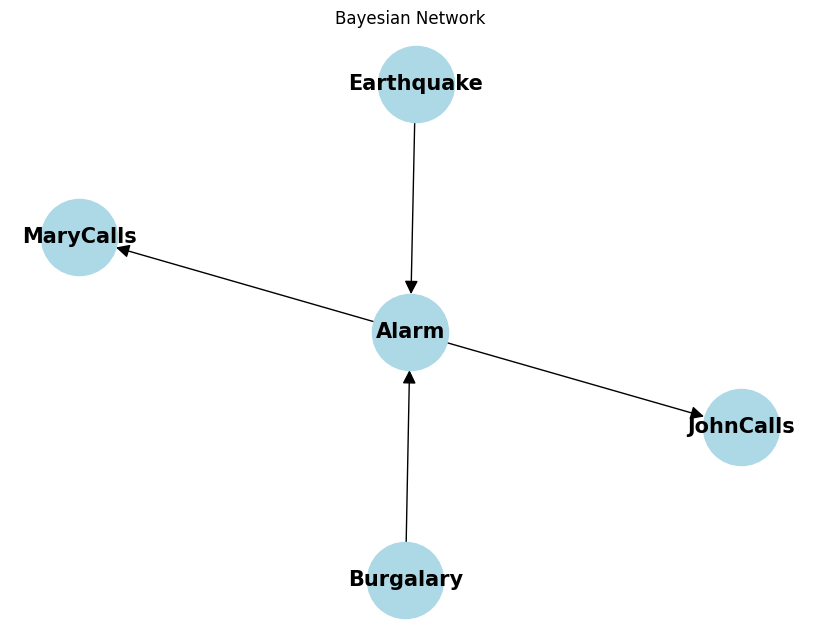

In [53]:
plot_bayesian_network(G, "Bayesian Network")

In [54]:
def variable_elimination_one(model, query_vars, evidence_vars):
    elimination_vars = list(set(model.nodes()) - set(query_vars) - set(evidence_vars))
    if elimination_vars:
        var_to_eliminate = elimination_vars[0]
        model.remove_node(var_to_eliminate)
        return var_to_eliminate
    return None

In [55]:
G11 = G.copy()

Eliminated Variable: MaryCalls


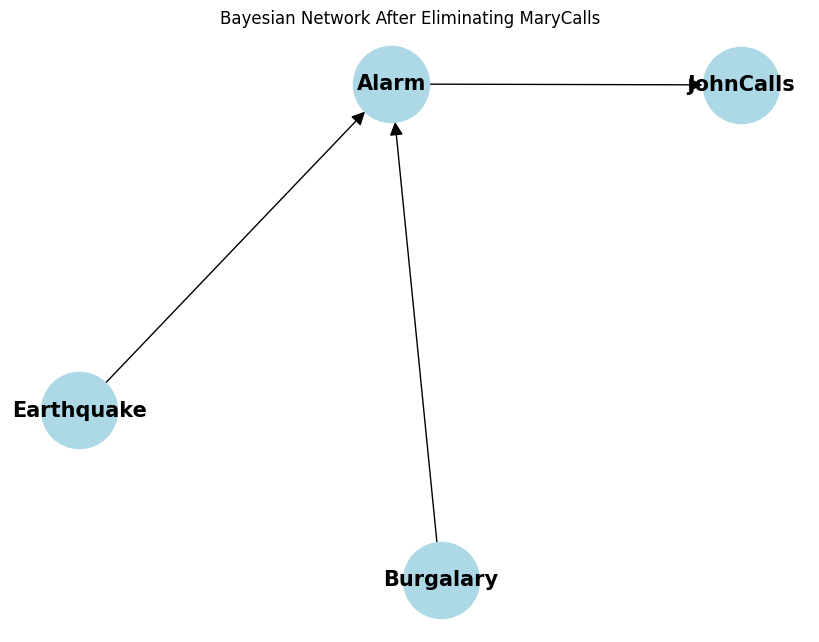

In [56]:
eliminated_var = variable_elimination_one(G11, ['Alarm'], ['Burgalary','Earthquake'])
if eliminated_var:
    print(f"Eliminated Variable: {eliminated_var}")
    plot_bayesian_network(G11, f"Bayesian Network After Eliminating {eliminated_var}")
else:
    print("No variable to eliminate.")